# COGS 118A: Final Project

#### Lilyanne Kurth-Yontz, A13325385

---

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import datasets into dataframes
df_ab = pd.read_csv('Frogs_MFCCs.csv')
df_ag = pd.read_csv('adult.csv')
df_sp = pd.read_csv('spambase.csv')

In [3]:
df_ab.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [4]:
df_ag.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df_sp.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### Turn categorical data into numerical data:

In [6]:
le = LabelEncoder()

In [7]:
df_ab = df_ab.apply(LabelEncoder().fit_transform)
df_ab.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,248,1587,227,418,6667,6518,5634,868,630,5535,...,907,1097,4848,6313,6025,2163,3,0,0,0
1,248,1896,252,1017,6754,6570,5049,296,517,6183,...,1051,1486,4083,5842,5181,2530,3,0,0,0
2,248,1577,291,1201,6377,5606,4376,217,482,6667,...,1327,2277,3159,4527,5629,3383,3,0,0,0
3,248,2609,1604,1701,6883,6989,4452,457,880,6883,...,623,139,1072,3611,1770,2423,3,0,0,0
4,248,741,342,1427,6732,6408,4361,142,620,6862,...,1338,1559,2372,4305,5839,3403,3,0,0,0


In [8]:
df_ag = df_ag.apply(LabelEncoder().fit_transform)
df_ag.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [9]:
#convert dataframes into numpy arrays
ab = df_ab.values
ag = df_ag.values
sp = df_sp.values

---

## Frogs_MFCCs.csv - 20/80, decision tree

In [10]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.2*len(X_ab))]
X_ab_test = X_ab[int(0.2*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.2*len(Y_ab))]
Y_ab_test = Y_ab[int(0.2*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(1439, 25) (5756, 25) (1439,) (5756,)


In [11]:
clf_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
depth_list = [1, 5, 10, 15, 20]
params = {'max_depth': depth_list}
grid_search = GridSearchCV(clf_tree, params, return_train_score = True, iid = True, cv = KFold(5))

In [12]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
def draw_heatmap_linear_tree(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

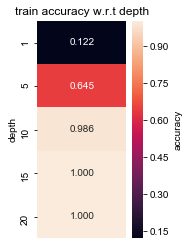

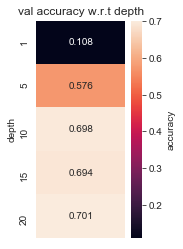

In [14]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [15]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 20}
0.700486448922863


---

## Frogs_MFCCs.csv - 50/50, decision tree

In [16]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.5*len(X_ab))]
X_ab_test = X_ab[int(0.5*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.5*len(Y_ab))]
Y_ab_test = Y_ab[int(0.5*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(3597, 25) (3598, 25) (3597,) (3598,)


In [17]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

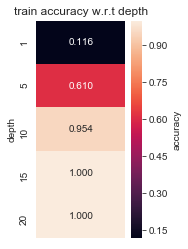

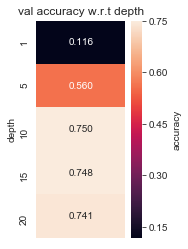

In [18]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [19]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 10}
0.7668148971650918


---

## Frogs_MFCCs.csv - 80/20, decision tree

In [20]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.8*len(X_ab))]
X_ab_test = X_ab[int(0.8*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.8*len(Y_ab))]
Y_ab_test = Y_ab[int(0.8*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(5756, 25) (1439, 25) (5756,) (1439,)


In [21]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

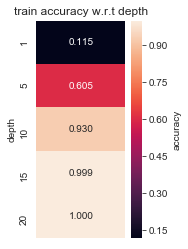

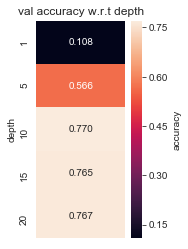

In [22]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [23]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 10}
0.7692842251563586


---

## Frogs_MFCCs.csv - 20/80, random forest

In [24]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.2*len(X_ab))]
X_ab_test = X_ab[int(0.2*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.2*len(Y_ab))]
Y_ab_test = Y_ab[int(0.2*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(1439, 25) (5756, 25) (1439,) (5756,)


In [25]:
clf_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10)
features_list = [1, 2, 4, 6, 8, 12, 16, 20]
params = {'max_features': features_list}
grid_search = GridSearchCV(clf_forest, params, return_train_score = True, iid = True, cv = KFold(5))

In [26]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
def draw_heatmap_linear_forest(acc, acc_desc, features_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=features_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='features')
    plt.title(acc_desc + ' w.r.t features')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

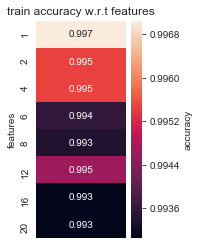

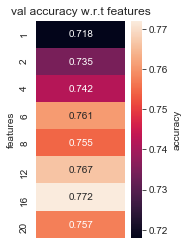

In [28]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [29]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'max_features': 16}
0.7904794996525365


---

## Frogs_MFCCs.csv - 50/50, random forest

In [30]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.5*len(X_ab))]
X_ab_test = X_ab[int(0.5*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.5*len(Y_ab))]
Y_ab_test = Y_ab[int(0.5*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(3597, 25) (3598, 25) (3597,) (3598,)


In [31]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

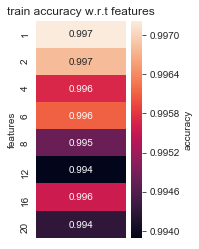

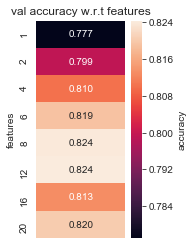

In [32]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [33]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'max_features': 12}
0.8346303501945526


---

## Frogs_MFCCs.csv - 80/20, random forest

In [34]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.8*len(X_ab))]
X_ab_test = X_ab[int(0.8*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.8*len(Y_ab))]
Y_ab_test = Y_ab[int(0.8*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(5756, 25) (1439, 25) (5756,) (1439,)


In [35]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

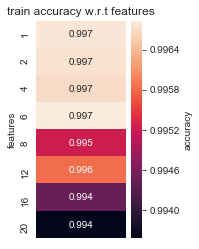

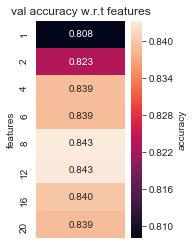

In [36]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [37]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'max_features': 8}
0.8422515635858235


---

## Frogs_MFCCs.csv - 20/80, knn

In [38]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.2*len(X_ab))]
X_ab_test = X_ab[int(0.2*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.2*len(Y_ab))]
Y_ab_test = Y_ab[int(0.2*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(1439, 25) (5756, 25) (1439,) (5756,)


In [39]:
clf_knn = KNeighborsClassifier()
neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
params = {'n_neighbors': neighbors_list}
grid_search = GridSearchCV(clf_knn, params, return_train_score = True, iid = True, cv = KFold(5))

In [40]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
def draw_heatmap_linear_knn(acc, acc_desc, neighbors_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=neighbors_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='neighbors')
    plt.title(acc_desc + ' w.r.t neighbors')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

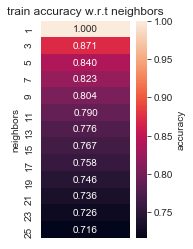

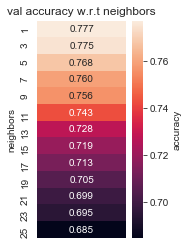

In [42]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [43]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 1}
0.7989923558026407


---

## Frogs_MFCCs.csv - 50/50, knn

In [44]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.5*len(X_ab))]
X_ab_test = X_ab[int(0.5*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.5*len(Y_ab))]
Y_ab_test = Y_ab[int(0.5*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(3597, 25) (3598, 25) (3597,) (3598,)


In [45]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

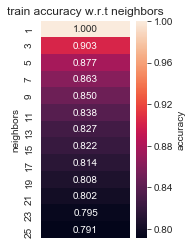

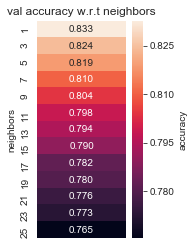

In [46]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [47]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 1}
0.8335186214563647


---

## Frogs_MFCCs.csv - 80/20, knn

In [48]:
np.random.shuffle(ab)
X_ab = ab[:, 0:-1]
Y_ab = ab[:, -1]
print(X_ab.shape, Y_ab.shape)

X_ab_train_val = X_ab[:int(0.8*len(X_ab))]
X_ab_test = X_ab[int(0.8*len(X_ab)):]
Y_ab_train_val = Y_ab[:int(0.8*len(Y_ab))]
Y_ab_test = Y_ab[int(0.8*len(Y_ab)):]
print(X_ab_train_val.shape, X_ab_test.shape, Y_ab_train_val.shape, Y_ab_test.shape)

(7195, 25) (7195,)
(5756, 25) (1439, 25) (5756,) (1439,)


In [49]:
grid_search.fit(X_ab_train_val, Y_ab_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

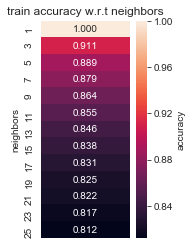

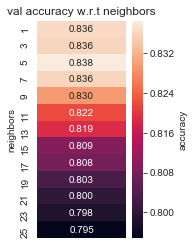

In [50]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [51]:
Y_pred = grid_search.best_estimator_.predict(X_ab_test)
score = grid_search.best_estimator_.score(X_ab_test, Y_ab_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 5}
0.8679638637943016


---

## adult.csv - 20/80, decision tree

In [52]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.2*len(X_ag))]
X_ag_test = X_ag[int(0.2*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.2*len(Y_ag))]
Y_ag_test = Y_ag[int(0.2*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(6512, 14) (26048, 14) (6512,) (26048,)


In [53]:
clf_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
depth_list = [1, 5, 10, 15, 20]
params = {'max_depth': depth_list}
grid_search = GridSearchCV(clf_tree, params, return_train_score = True, iid = True, cv = KFold(5))

In [54]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

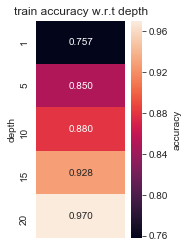

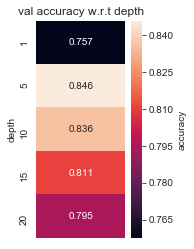

In [55]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [56]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 5}
0.843634828009828


---

## adult.csv - 50/50, decision tree

In [57]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.5*len(X_ag))]
X_ag_test = X_ag[int(0.5*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.5*len(Y_ag))]
Y_ag_test = Y_ag[int(0.5*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(16280, 14) (16280, 14) (16280,) (16280,)


In [58]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

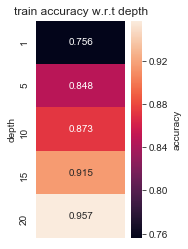

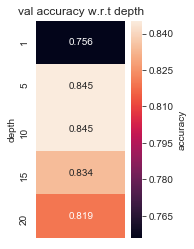

In [59]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [60]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 10}
0.8547297297297297


---

## adult.csv - 80/20, decision tree

In [61]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.8*len(X_ag))]
X_ag_test = X_ag[int(0.8*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.8*len(Y_ag))]
Y_ag_test = Y_ag[int(0.8*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(26048, 14) (6512, 14) (26048,) (6512,)


In [62]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

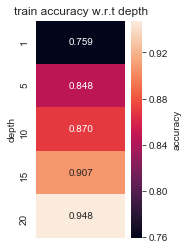

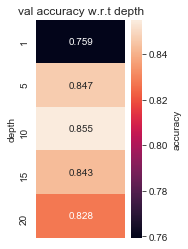

In [63]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [64]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 10}
0.8522727272727273


---

## adult.csv - 20/80, random forest

In [65]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.2*len(X_ag))]
X_ag_test = X_ag[int(0.2*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.2*len(Y_ag))]
Y_ag_test = Y_ag[int(0.2*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(6512, 14) (26048, 14) (6512,) (26048,)


In [66]:
clf_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10)
features_list = [1, 2, 4, 6, 8, 12]
params = {'max_features': features_list}
grid_search = GridSearchCV(clf_forest, params, return_train_score = True, iid = True, cv = KFold(5))

In [67]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

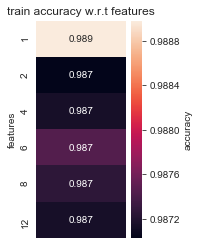

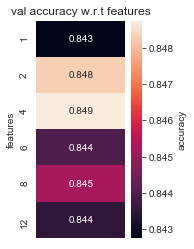

In [68]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [69]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'max_features': 4}
0.8424447174447175


---

## adult.csv - 50/50, random forest

In [70]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.5*len(X_ag))]
X_ag_test = X_ag[int(0.5*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.5*len(Y_ag))]
Y_ag_test = Y_ag[int(0.5*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(16280, 14) (16280, 14) (16280,) (16280,)


In [71]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

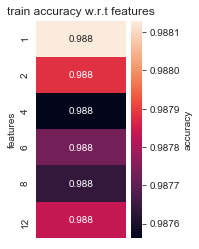

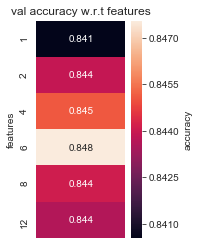

In [72]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [73]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'max_features': 6}
0.850982800982801


---

## adult.csv - 80/20, random forest

In [74]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.8*len(X_ag))]
X_ag_test = X_ag[int(0.8*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.8*len(Y_ag))]
Y_ag_test = Y_ag[int(0.8*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(26048, 14) (6512, 14) (26048,) (6512,)


In [75]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

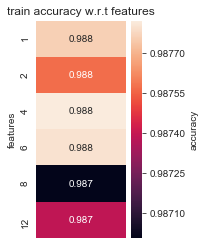

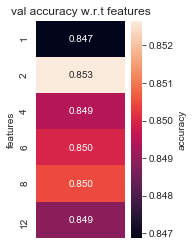

In [76]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [77]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'max_features': 2}
0.8396805896805897


---

## adult.csv - 20/80, knn

In [78]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.2*len(X_ag))]
X_ag_test = X_ag[int(0.2*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.2*len(Y_ag))]
Y_ag_test = Y_ag[int(0.2*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(6512, 14) (26048, 14) (6512,) (26048,)


In [79]:
clf_knn = KNeighborsClassifier()
neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
params = {'n_neighbors': neighbors_list}
grid_search = GridSearchCV(clf_knn, params, return_train_score = True, iid = True, cv = KFold(5))

In [80]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

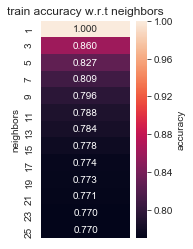

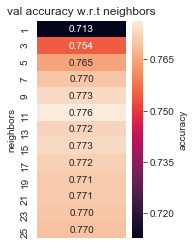

In [81]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [82]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 11}
0.7667767199017199


---

## adult.csv - 50/50, knn

In [83]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.5*len(X_ag))]
X_ag_test = X_ag[int(0.5*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.5*len(Y_ag))]
Y_ag_test = Y_ag[int(0.5*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(16280, 14) (16280, 14) (16280,) (16280,)


In [84]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

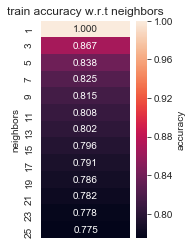

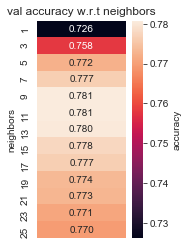

In [85]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [86]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 9}
0.7785012285012285


---

## adult.csv - 80/20, knn

In [87]:
np.random.shuffle(ag)
X_ag = ag[:, 0:-1]
Y_ag = ag[:, -1]
print(X_ag.shape, Y_ag.shape)

X_ag_train_val = X_ag[:int(0.8*len(X_ag))]
X_ag_test = X_ag[int(0.8*len(X_ag)):]
Y_ag_train_val = Y_ag[:int(0.8*len(Y_ag))]
Y_ag_test = Y_ag[int(0.8*len(Y_ag)):]
print(X_ag_train_val.shape, X_ag_test.shape, Y_ag_train_val.shape, Y_ag_test.shape)

(32560, 14) (32560,)
(26048, 14) (6512, 14) (26048,) (6512,)


In [88]:
grid_search.fit(X_ag_train_val, Y_ag_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

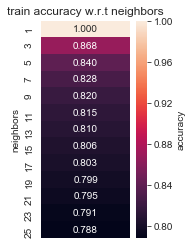

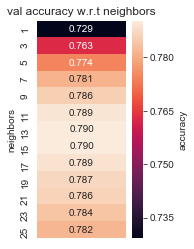

In [89]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [90]:
Y_pred = grid_search.best_estimator_.predict(X_ag_test)
score = grid_search.best_estimator_.score(X_ag_test, Y_ag_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 13}
0.788083538083538


---

## spambase.csv - 20/80, decision tree

In [91]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.2*len(X_sp))]
X_sp_test = X_sp[int(0.2*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.2*len(Y_sp))]
Y_sp_test = Y_sp[int(0.2*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(920, 57) (3680, 57) (920,) (3680,)


In [92]:
clf_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
depth_list = [1, 5, 10, 15, 20]
params = {'max_depth': depth_list}
grid_search = GridSearchCV(clf_tree, params, return_train_score = True, iid = True, cv = KFold(5))

In [93]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

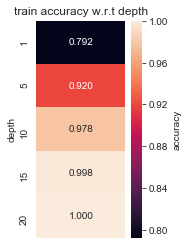

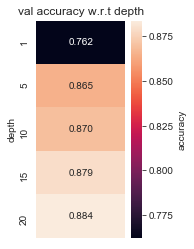

In [94]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [95]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 20}
0.8820652173913044


---

## spambase.csv - 50/50, decision tree

In [96]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.5*len(X_sp))]
X_sp_test = X_sp[int(0.5*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.5*len(Y_sp))]
Y_sp_test = Y_sp[int(0.5*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(2300, 57) (2300, 57) (2300,) (2300,)


In [97]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

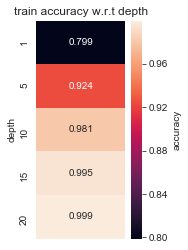

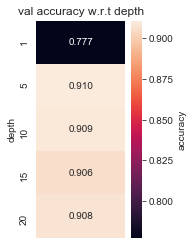

In [98]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [99]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 5}
0.8934782608695652


---

## spambase.csv - 80/20, decision tree

In [100]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.8*len(X_sp))]
X_sp_test = X_sp[int(0.8*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.8*len(Y_sp))]
Y_sp_test = Y_sp[int(0.8*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(3680, 57) (920, 57) (3680,) (920,)


In [101]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

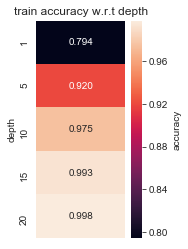

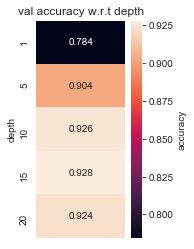

In [102]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_tree(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_tree(val_acc, 'val accuracy', depth_list)

In [103]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'max_depth': 15}
0.9141304347826087


---

## spambase.csv - 20/80, random forest

In [104]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.2*len(X_sp))]
X_sp_test = X_sp[int(0.2*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.2*len(Y_sp))]
Y_sp_test = Y_sp[int(0.2*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(920, 57) (3680, 57) (920,) (3680,)


In [105]:
clf_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10)
features_list = [1, 2, 4, 6, 8, 12, 16, 20]
params = {'max_features': features_list}
grid_search = GridSearchCV(clf_forest, params, return_train_score = True, iid = True, cv = KFold(5))

In [106]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

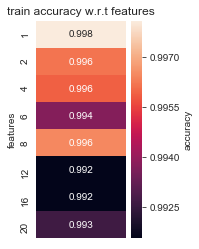

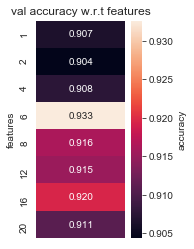

In [107]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [108]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'max_features': 6}
0.9309782608695653


---

## spambase.csv - 50/50, random forest

In [109]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.5*len(X_sp))]
X_sp_test = X_sp[int(0.5*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.5*len(Y_sp))]
Y_sp_test = Y_sp[int(0.5*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(2300, 57) (2300, 57) (2300,) (2300,)


In [110]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

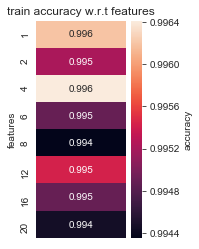

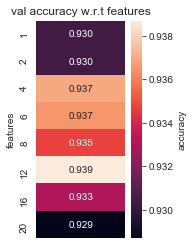

In [111]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [112]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'max_features': 12}
0.9395652173913044


---

## spambase.csv - 80/20, random forest

In [113]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.8*len(X_sp))]
X_sp_test = X_sp[int(0.8*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.8*len(Y_sp))]
Y_sp_test = Y_sp[int(0.8*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(3680, 57) (920, 57) (3680,) (920,)


In [114]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

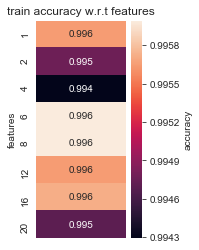

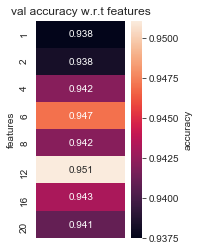

In [115]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_forest(train_acc, 'train accuracy', features_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_forest(val_acc, 'val accuracy', features_list)

In [116]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'max_features': 12}
0.9554347826086956


---

## spambase.csv - 20/80, knn

In [117]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.2*len(X_sp))]
X_sp_test = X_sp[int(0.2*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.2*len(Y_sp))]
Y_sp_test = Y_sp[int(0.2*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(920, 57) (3680, 57) (920,) (3680,)


In [118]:
clf_knn = KNeighborsClassifier()
neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
params = {'n_neighbors': neighbors_list}
grid_search = GridSearchCV(clf_knn, params, return_train_score = True, iid = True, cv = KFold(5))

In [119]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

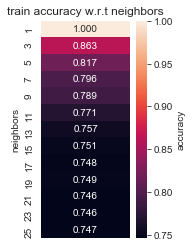

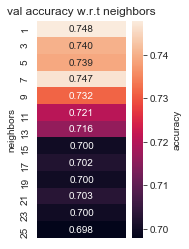

In [120]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [121]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 1}
0.7470108695652173


---

## spambase.csv - 50/50, knn

In [122]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.5*len(X_sp))]
X_sp_test = X_sp[int(0.5*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.5*len(Y_sp))]
Y_sp_test = Y_sp[int(0.5*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(2300, 57) (2300, 57) (2300,) (2300,)


In [123]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

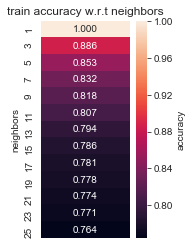

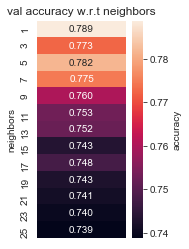

In [124]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [125]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 1}
0.7956521739130434


---

## spambase.csv - 80/20, knn

In [126]:
np.random.shuffle(sp)
X_sp = sp[:, 0:-1]
Y_sp = sp[:, -1]
print(X_sp.shape, Y_sp.shape)

X_sp_train_val = X_sp[:int(0.8*len(X_sp))]
X_sp_test = X_sp[int(0.8*len(X_sp)):]
Y_sp_train_val = Y_sp[:int(0.8*len(Y_sp))]
Y_sp_test = Y_sp[int(0.8*len(Y_sp)):]
print(X_sp_train_val.shape, X_sp_test.shape, Y_sp_train_val.shape, Y_sp_test.shape)

(4600, 57) (4600,)
(3680, 57) (920, 57) (3680,) (920,)


In [127]:
grid_search.fit(X_sp_train_val, Y_sp_train_val)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

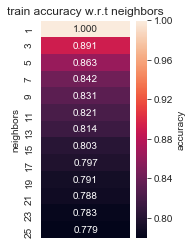

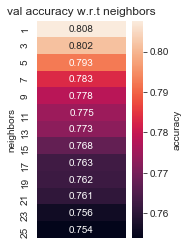

In [128]:
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear_knn(train_acc, 'train accuracy', neighbors_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear_knn(val_acc, 'val accuracy', neighbors_list)

In [129]:
Y_pred = grid_search.best_estimator_.predict(X_sp_test)
score = grid_search.best_estimator_.score(X_sp_test, Y_sp_test)
print(grid_search.best_params_)
print(score)

{'n_neighbors': 1}
0.8315217391304348
